In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
#reflect the table
Base = automap_base()
Base.prepare(engine, reflect=True)

In [14]:
# View all of the classes that automap found
for cls in Base.classes:
    print(cls)

<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [12]:
# Save references to each table
Base.classes.keys()

['measurement', 'station']

In [19]:
#define 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [ ]:

#Find the most recent date in the dataset.

#Using that date, get the previous 12 months of precipitation data by querying the previous 12 months of data.

In [21]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max('date')).scalar()
print("Most recent date:", most_recent_date)

Most recent date: date


In [22]:
#calculate date one year from last dataset
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#erforming the query to retrive the data and precipition scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# print results and save the query reasults as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)

# Print df
df = df.sort_index()

#sort the dataframe by date
print(df.to_string(index=False))


      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

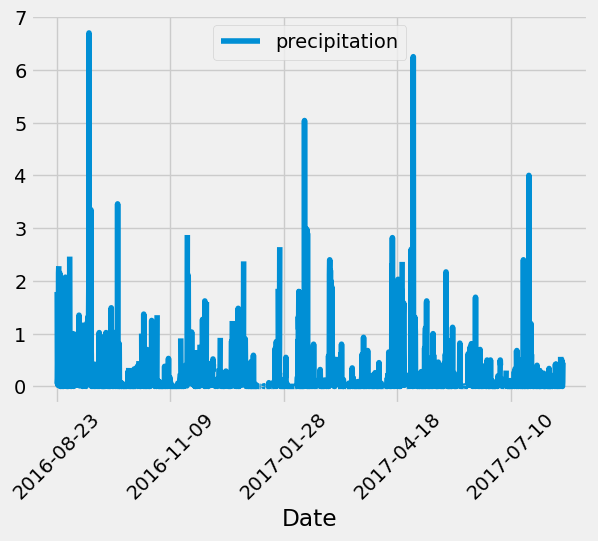

In [39]:
#to plot use pandas with matplotlib and plot the data 
df.plot() 
plt.xlabel('Date')
plt.xticks(rotation=45)

In [42]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df.describe()
print(summary_stats)

       precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number of stations in the dataset
number_stations = session.query(func.count(func.distinct('station'))).scalar()
print("Total number of stations:", number_stations) 


Total number of stations: 1


In [71]:
# Design a query to show how many stations are available in this dataset
number_stations = session.query(Station.station).count()

print(f"Number of stations available in this dataset: {number_stations}")
number_stations_df = pd.DataFrame({ "Number of Stations": number_stations}, index=[0])
number_stations_df

Number of stations available in this dataset: 9


,Number of Stations
0,9


In [50]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(Measurement.station, func.count()).\
    group_by(Measurement.station).\
    order_by(func.count().desc()).\
    all()

for station, count in station_counts:
    print(station, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [52]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station).\
        group_by(Measurement.station).\
        order_by(func.count().desc()).\
        first()

(most_active_station_id, ) = most_active_station
print(f"The station id of the most active station is {most_active_station_id}.")

most_active_station_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.station == most_active_station_id) .\
        all()

for lowest_temp, highest_temp, avg_temp in most_active_station_data:
    print(f"The lowest temperature recorded at {most_active_station_id} was {lowest_temp}.")
    print(f"The highest temperature recorded at {most_active_station_id} was {highest_temp}.")
    print(f"The average temperature recorded at {most_active_station_id} was {avg_temp}.")
    
temperature_df = pd.DataFrame({
    "Lowest Temperature": lowest_temp,
    "Highest Temperature": highest_temp,
    "Average Temperature": avg_temp
}, index=[0])

temperature_df

The station id of the most active station is USC00519281.
The lowest temperature recorded at USC00519281 was 54.0.
The highest temperature recorded at USC00519281 was 85.0.
The average temperature recorded at USC00519281 was 71.66378066378067.


,Lowest Temperature,Highest Temperature,Average Temperature
0,54.0,85.0,71.663781


In [105]:
#popular stations
weather_observations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

most_active_station = weather_observations[0][0]    
most_active_station
print("The most active station is",'popular_station',"containing",weather_observations[0][1],"weather observations.")

The most active station is popular_station containing 2772 weather observations.


In [104]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_intel = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date > prev_year).\
    order_by(Measurement.date).all()
temperature_intel

[('USC00519281', '2016-01-01', 74.0),
 ('USC00519281', '2016-01-02', 72.0),
 ('USC00519281', '2016-01-03', 68.0),
 ('USC00519281', '2016-01-04', 69.0),
 ('USC00519281', '2016-01-05', 70.0),
 ('USC00519281', '2016-01-06', 69.0),
 ('USC00519281', '2016-01-07', 76.0),
 ('USC00519281', '2016-01-08', 75.0),
 ('USC00519281', '2016-01-09', 74.0),
 ('USC00519281', '2016-01-10', 74.0),
 ('USC00519281', '2016-01-11', 73.0),
 ('USC00519281', '2016-01-12', 75.0),
 ('USC00519281', '2016-01-13', 74.0),
 ('USC00519281', '2016-01-14', 66.0),
 ('USC00519281', '2016-01-15', 71.0),
 ('USC00519281', '2016-01-16', 73.0),
 ('USC00519281', '2016-01-17', 75.0),
 ('USC00519281', '2016-01-18', 63.0),
 ('USC00519281', '2016-01-19', 61.0),
 ('USC00519281', '2016-01-20', 62.0),
 ('USC00519281', '2016-01-21', 65.0),
 ('USC00519281', '2016-01-22', 65.0),
 ('USC00519281', '2016-01-23', 75.0),
 ('USC00519281', '2016-01-24', 78.0),
 ('USC00519281', '2016-01-25', 69.0),
 ('USC00519281', '2016-01-26', 65.0),
 ('USC005192

FileNotFoundError: [Errno 2] No such file or directory: './Images/tobs_histogram_for_station_USC00519281.png'

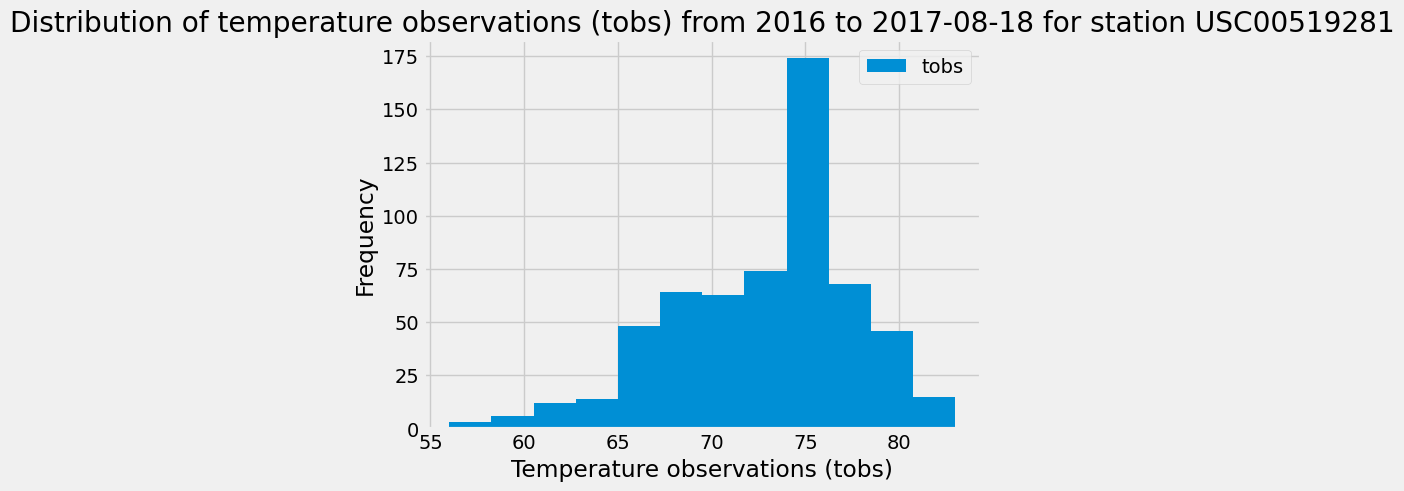

In [103]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
measurement_tuple = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).\
    filter(Measurement.station == most_active_station_id).first()
(most_recent_date,) = measurement_tuple
#most_recent_date = dt.datetime.str.time(latest_date, '%Y-%m-%d')
most_recent_date = latest_date
prev_year = latest_date.year - 1

last_year_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= prev_year).all()
    
prev_year_df = pd.DataFrame(last_year_data, columns=['date', 'tobs'])

prev_year_df

plt.hist(prev_year_df["tobs"], bins=12, label="tobs")
plt.ylabel('Frequency')
plt.xlabel('Temperature observations (tobs)')
plt.title(f"Distribution of temperature observations (tobs) from {prev_year} to {most_recent_date} for station {most_active_station_id}")
plt.grid(zorder=0)
plt.legend(loc="upper right")
plt.savefig(f"./Images/tobs_histogram_for_station_{most_active_station_id}.png", bbox_inches='tight')
plt.show()

# Close Session

In [107]:
# Close Session
session.close()